## Clustering LTE Sectors to Residential and Commercial
#### The intention is to use unsupervised learning in order to cluster LTE sectors based on the area they cover. The type of area that is covered is as follows:
— <span style="color:green">Residential

— <span style="color:limegreen">Semi-Residential

— <span style="color:orange">Semi-Commercial

— <span style="color:red">Commercial

#### The clustering outcome can be used for further network performance data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
import math
from sklearn.cluster import KMeans
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
temp_conn_df = pd.DataFrame(columns = ['Date', 'ElementID', 'ElementID1', 'Average_RRC_Connected_Users', 'Vendor'])

for i in range(0, 5):
    temp_df = pd.read_excel("Connected User2023_01_10.xlsx", sheet_name=i)
    temp_df.columns.values[3] = 'Average_RRC_Connected_Users'  
    temp_conn_df = pd.concat([temp_conn_df, temp_df], ignore_index=True)
    
print(len(temp_conn_df))
temp_conn_df.tail()

3771916


,Date,ElementID,ElementID1,Average_RRC_Connected_Users,Vendor
3771911,2023-01-09 11:00:00,SB,SB3L0079A1,10.470,N
3771912,2023-01-09 17:00:00,KH,KH2L1364A1,99.492,N
3771913,2023-01-09 01:00:00,FS,FS2L0908A2,5.630,N
3771914,2023-01-09 18:00:00,YZ,YZ1L0110B2,26.103,N
3771915,2023-01-09 10:00:00,KH,KH3L1354B1,23.381,N


In [3]:
temp_conn_df.tail()

,Date,ElementID,ElementID1,Average_RRC_Connected_Users,Vendor
3771911,2023-01-09 11:00:00,SB,SB3L0079A1,10.470,N
3771912,2023-01-09 17:00:00,KH,KH2L1364A1,99.492,N
3771913,2023-01-09 01:00:00,FS,FS2L0908A2,5.630,N
3771914,2023-01-09 18:00:00,YZ,YZ1L0110B2,26.103,N
3771915,2023-01-09 10:00:00,KH,KH3L1354B1,23.381,N


In [4]:
temp_conn_df['Sector_ID'] = temp_conn_df['ElementID1'].str[:2] + temp_conn_df['ElementID1'].str[4:9]
temp_conn_df['Hour'] = temp_conn_df['Date'].dt.hour

In [5]:
# Sector level aggregation
df1 = temp_conn_df[['Sector_ID', 'Average_RRC_Connected_Users', 'Hour']].groupby(by=['Sector_ID', 'Hour']).sum().round(1)
df1.head(25)

Average_RRC_Connected_Users
Sector_ID Hour                             
AG0001A   0                            69.7
          1                            57.5
          2                            46.9
          3                            39.6
          4                            31.0
          5                            27.0
          6                            30.5
          7                            40.7
          8                            50.4
          9                            50.8
          10                           61.5
          11                           61.3
          12                           67.8
          13                           74.0
          14                           69.0
          15                           64.9
          16                           62.6
          17                           65.6
          18                           67.7
          19                           68.3
          20                           71.4
          21                           77.8
          22                           81.7
          23                           78.6
AG0001B   0                            65.8

In [6]:
df2 = df1.copy()
df2.reset_index(inplace=True)
df2 = df2[['Sector_ID', 'Average_RRC_Connected_Users']].groupby(by=['Sector_ID']).max().round(1)
df2.rename(columns={"Average_RRC_Connected_Users": "CU_max"}, inplace=True)
df2.head(3)

,CU_max
Sector_ID,
AG0001A,81.7
AG0001B,82.8
AG0001C,211.8


In [7]:
df3 = df1.copy()
df3.reset_index(inplace=True)
df3 = df3[['Sector_ID', 'Average_RRC_Connected_Users']].groupby(by=['Sector_ID']).mean().round(1)
df3.rename(columns={"Average_RRC_Connected_Users": "CU_ave"}, inplace=True)
df3.head(3)

,CU_ave
Sector_ID,
AG0001A,59.0
AG0001B,61.4
AG0001C,147.1


In [8]:
df4 = df1.copy()
df4.reset_index(inplace=True)
df4 = df4[df4['Hour'] == 13]
df4 = df4[['Sector_ID', 'Average_RRC_Connected_Users']]
df4.rename(columns={"Average_RRC_Connected_Users": "CU_13H"}, inplace=True)
df4.set_index('Sector_ID', inplace=True)
df4.head(3)

,CU_13H
Sector_ID,
AG0001A,74.0
AG0001B,82.6
AG0001C,192.1


In [9]:
df5 = df1.copy()
df5.reset_index(inplace=True, )
df5 = df5[df5['Hour'] == 23]
df5 = df5[['Sector_ID', 'Average_RRC_Connected_Users']]
df5.rename(columns={"Average_RRC_Connected_Users": "CU_23H"}, inplace=True)
df5.set_index('Sector_ID', inplace=True)
df5.head(3)

,CU_23H
Sector_ID,
AG0001A,78.6
AG0001B,77.8
AG0001C,194.7


In [10]:
df6 = df1.copy()
df6.reset_index(inplace=True)
df6.set_index('Hour', inplace=True)
df6 = df6[['Sector_ID', 'Average_RRC_Connected_Users']].groupby(by=['Sector_ID']).idxmax()
df6.rename(columns={"Average_RRC_Connected_Users": "BH"}, inplace=True)
df6.head(3)

,BH
Sector_ID,
AG0001A,22
AG0001B,12
AG0001C,19


In [11]:
dfs = [df2, df3, df4, df5, df6]

CU_df = pd.concat(dfs, join='outer', axis=1)

In [12]:
CU_df.shape

(57531, 5)

In [13]:
LTE_Sectors_df = pd.read_excel("LTE_Sectors.xlsx")
LTE_Sectors_df.rename(columns={"Sector": "Sector_ID", 'LATITUDE': 'Lat', 'LONGITUDE': 'Long', 'AZIMUTH': 'Azimuth'}, inplace=True)
LTE_Sectors_df.set_index('Sector_ID', inplace=True)
LTE_Sectors_df.head(3)

,Lat,Long,Azimuth
Sector_ID,,,
AG0001A,37.53126,45.03188,85.0
AG0001B,37.53126,45.03188,190.0
AG0001C,37.53126,45.03188,300.0


In [14]:
sector_df = pd.merge(LTE_Sectors_df, CU_df, how='right', on='Sector_ID')
sector_df.reset_index(inplace=True)

In [15]:
sector_df.head(3)

,Sector_ID,Lat,Long,Azimuth,CU_max,CU_ave,CU_13H,CU_23H,BH
0,AG0001A,37.53126,45.03188,85.0,81.7,59.0,74.0,78.6,22
1,AG0001B,37.53126,45.03188,190.0,82.8,61.4,82.6,77.8,12
2,AG0001C,37.53126,45.03188,300.0,211.8,147.1,192.1,194.7,19


### Feature Description
- Working Hour: (Average Connected User / Peak Connected User) * 24
- Residential Factor: Connected User for 23:00 / Average Connected User
- Commercial Factor: Connected User for 13:00 / Average Connected User
- Busy Hour

In [16]:
sector_df['Working Hour'] = (sector_df.CU_ave / sector_df.CU_max) * 24
sector_df['Residential Factor'] = sector_df.CU_23H / sector_df.CU_ave
sector_df['Commercial Factor'] = sector_df.CU_13H / sector_df.CU_ave

In [17]:
sector_df.dropna(inplace=True)
sector_df.drop_duplicates(subset=['Sector_ID'], inplace=True)
sector_df.reset_index(inplace=True)

In [18]:
# making a feature list
features = [
    f for f in sector_df.columns if f not in ('Sector_ID', 'Lat', 'Long', 'Azimuth', 'CU_max', 'CU_ave', 'CU_13H', 'CU_23H')]

cluster_df = sector_df[features]
features

['index', 'BH', 'Working Hour', 'Residential Factor', 'Commercial Factor']

In [19]:
# Feature Scalling
from sklearn import preprocessing

Scalling = 'standard' # 'none', 'normal', 'standard'

if Scalling == 'standard':
    scalled_cluster_ar = preprocessing.StandardScaler().fit_transform(cluster_df)
    
elif Scalling == 'normal':
    scalled_cluster_ar = preprocessing.MinMaxScaler().fit_transform(cluster_df)
    
elif Scalling == 'none':
    scalled_cluster_ar = cluster_df

print(scalled_cluster_ar.min())
print(scalled_cluster_ar.max())

-6.684347253512147
27.898839278034483


### Defining the number of clusters using elbow method

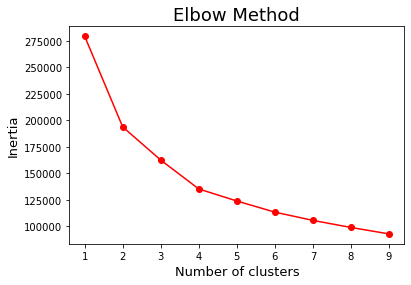

In [20]:
# Elbow method for optimal value of k in KMeans
inertia_list = []
for k in np.arange(1, 10):
    kmn = KMeans(n_clusters=k)
    kmn.fit(scalled_cluster_ar)
    inertia_list.append(kmn.inertia_)
    
plt.plot(np.arange(1,10),inertia_list,'ro-')
plt.title('Elbow Method', fontsize=18)
plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Inertia', fontsize=13)
plt.show()

### Sector Clustering

In [21]:
kmn = KMeans(n_clusters=4, random_state=4)
kmn.fit(scalled_cluster_ar)

KMeans(n_clusters=4, random_state=4)

In [22]:
# Appending labels to sector_df

sector_df['Label'] = kmn.labels_

Color_Label = {0: "limegreen", 1: "red", 2: "green", 3: "orange"}
sector_df['Color'] = sector_df['Label'].map(Color_Label)

Type_Label = {0: "Semi-Residential", 1: "Commercial", 2: "Residential", 3: "Semi-Commercial"}
sector_df['Type'] = sector_df['Label'].map(Type_Label)

sector_df.head(3)

,index,Sector_ID,Lat,Long,Azimuth,CU_max,CU_ave,CU_13H,CU_23H,BH,Working Hour,Residential Factor,Commercial Factor,Label,Color,Type
0,0,AG0001A,37.53126,45.03188,85.0,81.7,59.0,74.0,78.6,22,17.331701,1.332203,1.254237,0,limegreen,Semi-Residential
1,1,AG0001B,37.53126,45.03188,190.0,82.8,61.4,82.6,77.8,12,17.797101,1.267101,1.345277,3,orange,Semi-Commercial
2,2,AG0001C,37.53126,45.03188,300.0,211.8,147.1,192.1,194.7,19,16.668555,1.323589,1.305914,0,limegreen,Semi-Residential


In [23]:
sector_df[['Label', 'BH', 'Working Hour', 'Residential Factor', 'Commercial Factor']].groupby(by=['Label']).mean().round(1)

,BH,Working Hour,Residential Factor,Commercial Factor
Label,,,,
0,20.9,15.7,1.3,1.2
1,13.1,11.5,0.6,1.7
2,20.7,15.8,1.3,1.1
3,12.4,15.9,1.0,1.3


In [24]:
len(kmn.labels_)

55840

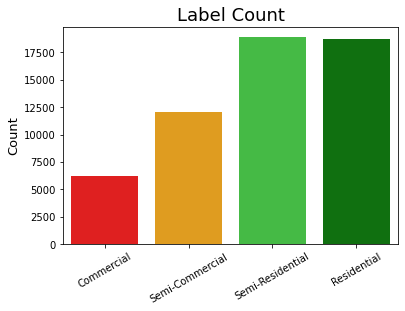

In [25]:
b = sns.countplot(x='Type', data=sector_df, palette=["red", "orange", "limegreen", "green"],
                 order=["Commercial", "Semi-Commercial", "Semi-Residential", "Residential"])
b.set_title('Label Count', fontsize=18)
b.set_ylabel("Count", fontsize=13)
b.tick_params(axis='x', rotation=30)
b.set_xlabel("");

### Functions for creating sectors

In [26]:
def degree2rad(degrees):
    return degrees * pi / 180


def sec_poly(long, lat, bearing, radius=0.5, vbw=60):
    R = 6378.1  # Radius of the Earth
    rad_bearing = degree2rad(bearing)

    site_lat = math.radians(lat)  # site lat point converted to radians
    site_lon = math.radians(long)  # site long point converted to radians

    coords = []
    n = 5
    t = np.linspace(degree2rad(bearing - (vbw / 2)), degree2rad(bearing + (vbw / 2)), n)
    for brg in t:
        bor_lat = math.asin(math.sin(site_lat) * math.cos(radius / R) + math.cos(site_lat) * math.sin(radius / R) * math.cos(brg))
        bor_lon = site_lon + math.atan2(math.sin(brg) * math.sin(radius / R) * math.cos(site_lat),
                                    math.cos(radius / R) - math.sin(site_lat) * math.sin(bor_lat))

        bor_lat = math.degrees(bor_lat)
        bor_lon = math.degrees(bor_lon)

        coords.append([bor_lon, bor_lat])

    coords.insert(0, [long, lat])
    coords.append([long, lat])

    return (coords)

### Creating sector polygons for all sectors in the file in GeoJSON format

In [27]:
radius = 0.3
vbw = 60
GeoJSON_list = []

for i in range(0,len(sector_df)):
    poly_sec_list = sec_poly(sector_df['Long'][i], sector_df['Lat'][i], sector_df['Azimuth'][i], radius, vbw)
    
    GeoJSON_list.append(dict(type= 'Feature', properties= dict(Sector_ID=sector_df['Sector_ID'][i]),
                             geometry= dict(type= 'Polygon', coordinates= [poly_sec_list]),
                             Sector_ID= sector_df['Sector_ID'][i]))

In [28]:
GeoJSON_dict = {'type': 'FeatureCollection', 'features': GeoJSON_list}

### Ploting sectors on map

In [ ]:
cluster_fig = px.choropleth_mapbox(sector_df, geojson=GeoJSON_dict,color=sector_df.Type, 
                           color_discrete_map={"Semi-Residential":"limegreen", "Commercial": "red", "Semi-Commercial":"orange", "Residential":"green"},
                           locations=sector_df['Sector_ID'], featureidkey="properties.Sector_ID",
                           center={"lat": 35.67435, "lon": 51.4813},
                           mapbox_style="carto-positron", zoom=10)
cluster_fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                       legend=dict(
                           x=0,
                           y=1,
                           title="",
                           bgcolor='rgba(255, 255, 255, 0)',
                           bordercolor='rgba(255, 255, 255, 0)',
                           font=dict(color='blue')))

cluster_fig.show()

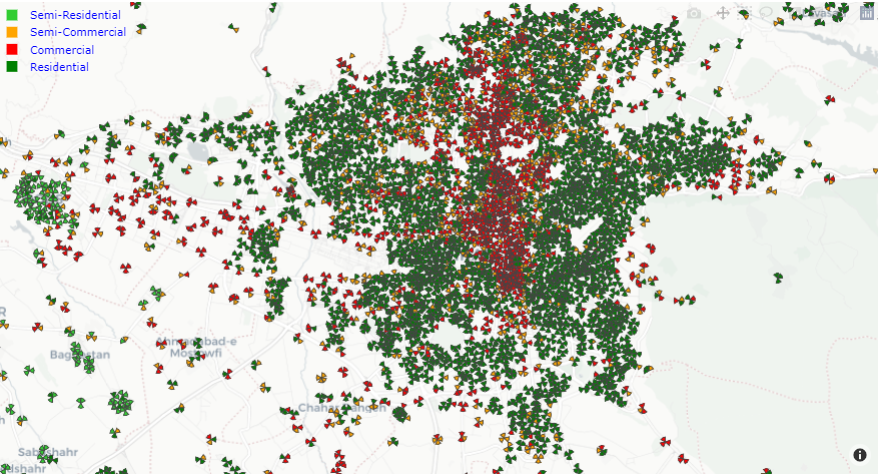

In [30]:
sector_df.to_excel("K-Means_Clustering.xlsx", index=False)